# Calculus - *Fourier Series*
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [calculus_fourier-series.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Mathematical-Foundations/calculus_fourier-series.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from calculus_fourierSeries__utils import *

In [2]:
plt.rcParams['figure.figsize'] = (18, 6)

Given an arbitrary function defined in the interval $[-\pi, \pi]$:

$$ \large
f(t)=\frac{t}{\pi}, \quad \text{for} -\pi \leq t \leq \pi
$$

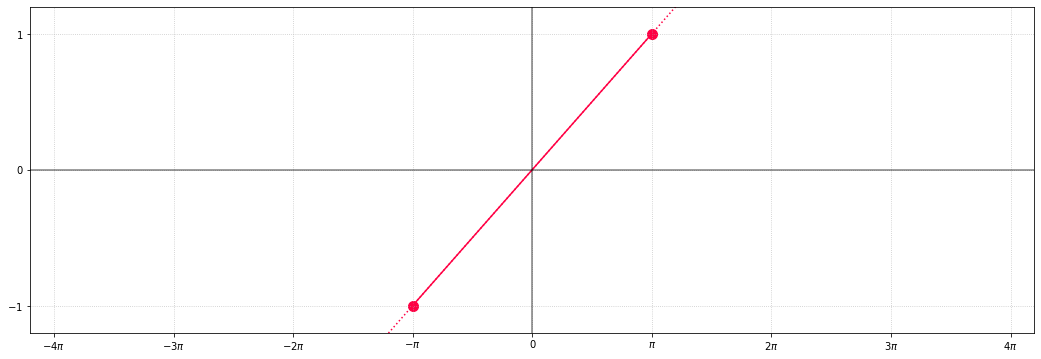

In [3]:
# Function f(t)
f = lambda t: t/np.pi

# visualization
plot_function1(f)

The periodic fourier serie (in sine-cosine form) of the function $f(t)$ is:

$$ \large
s(t)=\frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos(nt) + \sum_{n=1}^{\infty}b_n\sin(nt)
$$

Where the coeficients $a_0$, $a_n$ and $b_n$ are calculated by:

$$ \large
\begin{aligned}
a_0 &= \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) dt \\
a_n &= \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) \cos(nt) dt \\
b_n &= \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) \sin(nt) dt
\end{aligned}
$$

The resulting serie is a periodic and infinity function. Even if it has jump discontinuity (it happens only in the infinity), its values are always finites, so that:

$$ \large
s(t_i)=\frac{\displaystyle \lim_{t_i\rightarrow t^+}f(t) + \lim_{t_i\rightarrow t^-}f(t)}{2}
$$

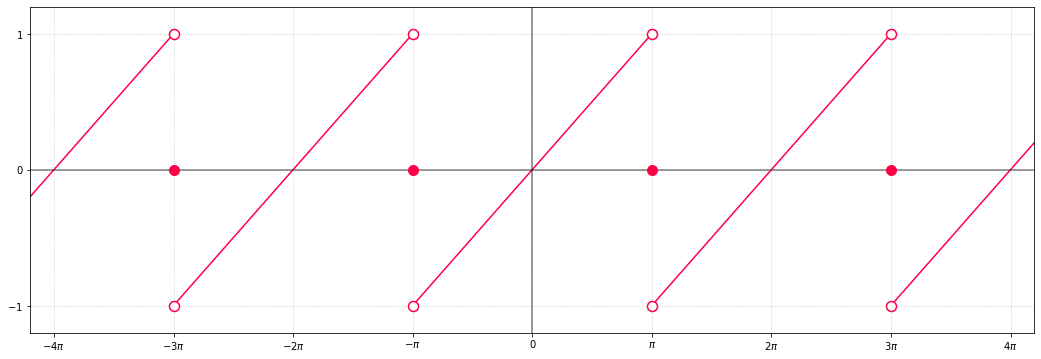

In [4]:
# Visualize periodic function
periodic_function1(f)

The first step is to calculate $a_0$:

$$ \large
\begin{aligned}
a_0 &= \frac{1}{\pi} \int_{-\pi}^{\pi} \frac{t}{\pi} dt  \\
    &= \frac{1}{\pi} \frac{t^2}{2\pi} \biggr\rvert_{-\pi}^{\pi} \\
a_0 &= 0
\end{aligned}
$$

Fourier series has a very strong behaviour where *odd functions* has the $\large a$'s ($a_0$ and $a_n$) coefficients equal to zero and *even functions* has the $\large b_n$ coefficient equal to zero. When the functions is neither even nor odd, the function will be decomposed into all coefficients. So, as we can expect (given our $f(t)$ is an odd function), the coefficient $a_n$ is going to be equal to zero.

$$ \large
\begin{aligned}
a_n &= \frac{1}{\pi} \int_{-\pi}^{\pi} \frac{t}{\pi} \cos(nt) dt \\
    &= \frac{1}{\pi^2} \left. \left[ \frac{t \sin(nt)}{n} \right|_{-\pi}^{\pi} -\int_{-\pi}^{\pi} \frac{\sin(nt)}{n} dt \right] \\
    &= \frac{1}{\pi^2} \left[ 0 - \left. \left( - \frac{cos(nt)}{n^2} \right) \right|_{-\pi}^{\pi} \right] \\
    &= \frac{1}{\pi} \left[ \frac{cos(n\pi)}{n^2} - \frac{cos(-n\pi)}{n^2} \right] \\
    &= \frac{1}{\pi} \cdot 0 \quad , \quad \text{due} \cos(n\pi) =  \cos(-n\pi) \\
a_n &= 0
\end{aligned}
$$

The $b_n$ coefficient must be calculated. To do that we have to keep in mind 2 things:
- The cosine function is even so $cos(nt) = cos(-nt)$
- The cosine function is an alternator for harmonics of $\pi$ what it means that when $n$ is *even* the result is $1$ and when it is *odd* the result is $-1$.

$$ \large
\begin{aligned}
b_n &= \frac{1}{\pi} \int_{-\pi}^{\pi} \frac{t}{\pi} \sin(nt) dt \\
    &= \frac{1}{\pi^2} \left. \left[ - \frac{t \cos(nt)}{n} \right|_{-\pi}^{\pi} -\int_{-\pi}^{\pi} - \frac{\cos(nt)}{n} dt \right] \\
    &= \frac{1}{\pi^2} \left[ - \left[ \frac{\pi \cos(n\pi)}{n} - \frac{(-\pi) \cos(-n\pi)}{n} \right] + \left. \frac{t\sin(nt)}{n^2} \right|_{-\pi}^{\pi} \right] \\
    &= \frac{1}{\pi^2} \left[ - \frac{2\pi cos(n\pi)}{n} + 0 \right] \quad , \quad \text{due} \cos(n\pi) =  \cos(-n\pi) \\
    &= - \frac{2\cos(n\pi)}{n\pi} \\
    &= \begin{cases}
- \frac{2}{n\pi} &, \text{n is even} \\
\frac{2}{n\pi} &, \text{n is odd}
\end{cases} \\
b_n &= \frac{2}{\pi}\frac{(-1)^{n+1}}{n} \quad , \quad n \geq 1
\end{aligned}
$$

Notice that we transposed the cosine function into a serie alternator given the behavior of the result depending on the value of $n$. Having that, our fourier serie of $f(t)$ is defined by:

$$ \large
s(t) = \frac{2}{\pi} \sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n} \sin(nt)
$$

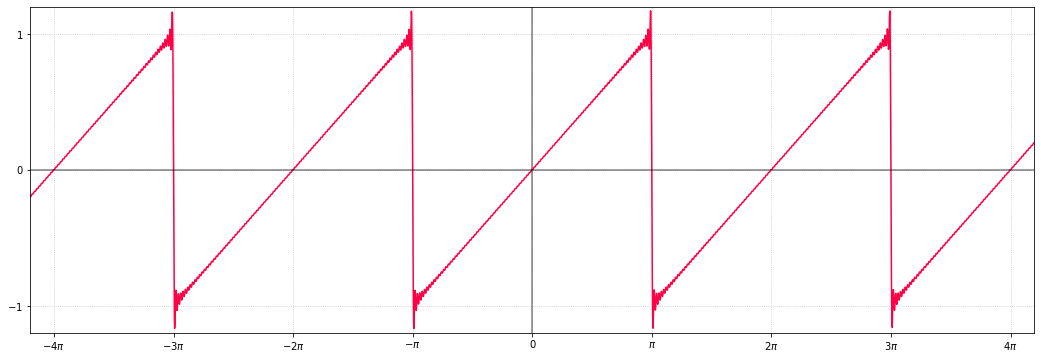

In [5]:
# Number of serie elements.
# Tends to the infinity
N = 100

# The Fourier serie
s = lambda t: 2/np.pi*np.sum(
    [(-1)**(n+1)/n*np.sin(n*t) for n in range(1, N + 1)],
    axis=0
)

# visualization
serie_function1(s)

## Example 1. Even function
---
Given de even function in the interval $[-\pi, \pi]$:

$$ \large
f(t) = t^2, \quad \text{for} -\pi \leq t \leq \pi
$$

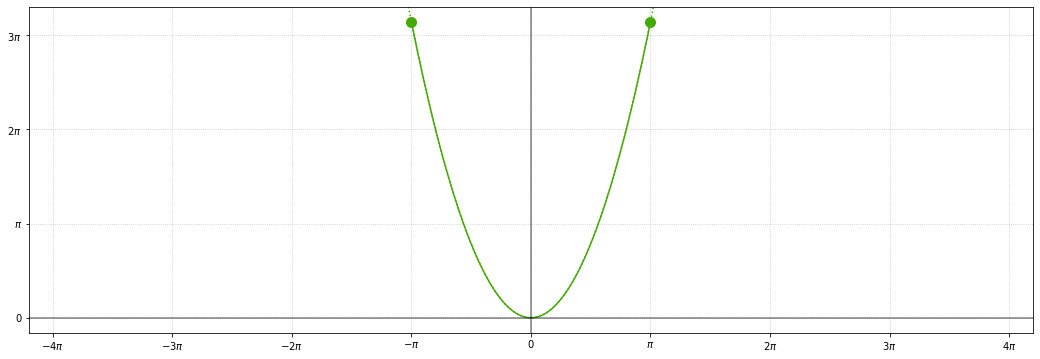

In [6]:
# Function f(t)
f = lambda t: t**2

# visualization
plot_function2(f)

The resulting poriodic function has a removable discontinuity.

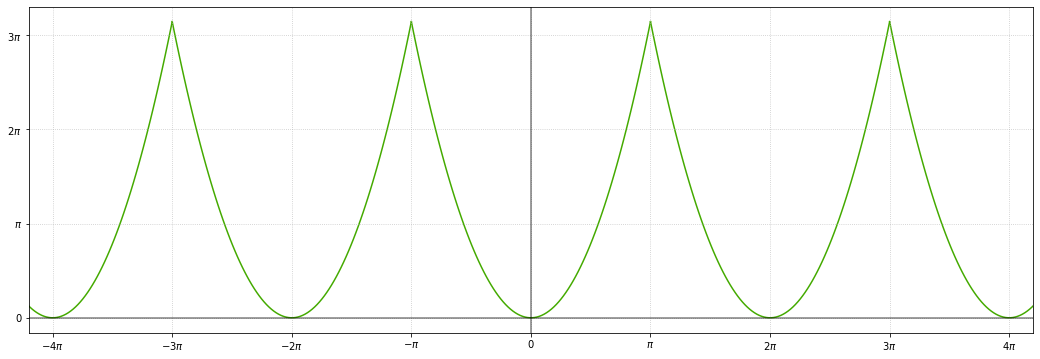

In [7]:
# Visualize periodic function
periodic_function2(f)

The final result of the coefficients $a_0$, $b_0$ and $b_n$ are:

$$ \large
\begin{aligned}
a_0 &= \frac{2\pi^2}{3} \\
a_n &= \frac{4}{n^2} \cos(n\pi) = (-1)^n \frac{4}{n^2} \\
b_n &= 0
\end{aligned}
$$

The coefficient $b_n$ is null due the function $f(t)$ being even. Thus, the fourier serie is defined as:

$$ \large
\begin{aligned}
s(t) &= \frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos(nt) + \sum_{n=1}^{\infty}b_n\sin(nt) \\
s(t) &= \frac{\pi^2}{3} + \sum_{n=1}^{\infty} (-1)^n \frac{4}{n^2} \cos(nt)
\end{aligned}
$$

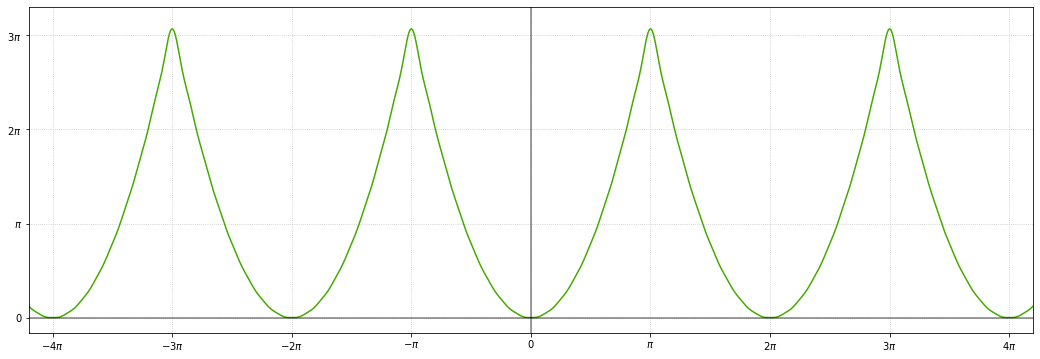

In [8]:
# Number of serie elements.
# Tends to the infinity
N = 16

# The Fourier serie
s = lambda t: np.pi**2/3 + np.sum(
    [(-1)**n*4/n**2*np.cos(n*t) for n in range(1, N + 1)],
    axis=0
)

# visualization
serie_function2(s)

## General form
---
As we can notice, the functions $f(t)$ were defined in the interval $[-\pi, \pi]$. It happened because the base period $L$ of a periodic function is usually $2\pi$ but we can define the fourier serie of a function in any interval. Considering $L=2P$, the general form can be understood as:

$$ \large
s(t)=\frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos \left(\frac{\pi nt}{P}\right) + \sum_{n=1}^{\infty}b_n\sin \left(\frac{\pi nt}{P}\right)
$$

Now, the interval is going to be $[-P, P]$ if it steel centered in 0. If it has a phase offset, we can undestand the interval as $[\theta - P, \theta + P]$.

$$ \large
\begin{aligned}
a_0 &= \frac{1}{P} \int_{\theta - P}^{\theta + P} f(t) dt \\
a_n &= \frac{1}{P} \int_{\theta - P}^{\theta + P} f(t) \cos \left(\frac{\pi nt}{P}\right) dt \\
b_n &= \frac{1}{P} \int_{\theta - P}^{\theta + P} f(t) \sin \left(\frac{\pi nt}{P}\right) dt
\end{aligned}
$$